In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None) 

In [3]:
df = pd.read_csv('data/philosophy_data.csv')

In [4]:
df.head()

,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str
0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...","What's new, Socrates, to make you leave your ...",-350,1997,125,"what's new, socrates, to make you leave your ...","['what', 'new', 'socrates', 'to', 'make', 'you...","what be new , Socrates , to make -PRON- lea..."
1,Plato - Complete Works,Plato,plato,Surely you are not prosecuting anyone before t...,Surely you are not prosecuting anyone before t...,-350,1997,69,surely you are not prosecuting anyone before t...,"['surely', 'you', 'are', 'not', 'prosecuting',...",surely -PRON- be not prosecute anyone before ...
2,Plato - Complete Works,Plato,plato,The Athenians do not call this a prosecution b...,The Athenians do not call this a prosecution b...,-350,1997,74,the athenians do not call this a prosecution b...,"['the', 'athenians', 'do', 'not', 'call', 'thi...",the Athenians do not call this a prosecution ...
3,Plato - Complete Works,Plato,plato,What is this you say?,What is this you say?,-350,1997,21,what is this you say?,"['what', 'is', 'this', 'you', 'say']",what be this -PRON- say ?
4,Plato - Complete Works,Plato,plato,"Someone must have indicted you, for you are no...","Someone must have indicted you, for you are no...",-350,1997,101,"someone must have indicted you, for you are no...","['someone', 'must', 'have', 'indicted', 'you',...","someone must have indict -PRON- , for -PRON- ..."


In [5]:
df.isnull().sum()

title                        0
author                       0
school                       0
sentence_spacy               0
sentence_str                 0
original_publication_date    0
corpus_edition_date          0
sentence_length              0
sentence_lowered             0
tokenized_txt                0
lemmatized_str               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360808 entries, 0 to 360807
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   title                      360808 non-null  object
 1   author                     360808 non-null  object
 2   school                     360808 non-null  object
 3   sentence_spacy             360808 non-null  object
 4   sentence_str               360808 non-null  object
 5   original_publication_date  360808 non-null  int64 
 6   corpus_edition_date        360808 non-null  int64 
 7   sentence_length            360808 non-null  int64 
 8   sentence_lowered           360808 non-null  object
 9   tokenized_txt              360808 non-null  object
 10  lemmatized_str             360808 non-null  object
dtypes: int64(3), object(8)
memory usage: 30.3+ MB


In [7]:
df.loc[df['sentence_lowered'].duplicated(keep=False), :]

,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str
16153,Plato - Complete Works,Plato,plato,how does it seem to you?,how does it seem to you?,-350,1997,24,how does it seem to you?,"['how', 'does', 'it', 'seem', 'to', 'you']",how do -PRON- seem to -PRON- ?
24096,Plato - Complete Works,Plato,plato,How does it seem to you?,How does it seem to you?,-350,1997,24,how does it seem to you?,"['how', 'does', 'it', 'seem', 'to', 'you']",how do -PRON- seem to -PRON- ?
42066,Aristotle - Complete Works,Aristotle,aristotle,Why does it thunder?,Why does it thunder?,-320,1991,20,why does it thunder?,"['why', 'does', 'it', 'thunder']",why do -PRON- thunder ?
43972,Aristotle - Complete Works,Aristotle,aristotle,(it makes no difference,(it makes no difference,-320,1991,23,(it makes no difference,"['it', 'makes', 'no', 'difference']",( -PRON- make no difference
45092,Aristotle - Complete Works,Aristotle,aristotle,their premisses are false and their conclusion...,their premisses are false and their conclusion...,-320,1991,62,their premisses are false and their conclusion...,"['their', 'premisses', 'are', 'false', 'and', ...",-PRON- premiss be false and -PRON- conclusion...
45127,Aristotle - Complete Works,Aristotle,aristotle,Their premisses are false and their conclusion...,Their premisses are false and their conclusion...,-320,1991,62,their premisses are false and their conclusion...,"['their', 'premisses', 'are', 'false', 'and', ...",-PRON- premiss be false and -PRON- conclusion...
72817,Aristotle - Complete Works,Aristotle,aristotle,why does it thunder?,why does it thunder?,-320,1991,20,why does it thunder?,"['why', 'does', 'it', 'thunder']",why do -PRON- thunder ?
90434,Essay Concerning Human Understanding,Locke,empiricism,"What is positive, what negative, in our Idea o...","What is positive, what negative, in our Idea o...",1689,2004,57,"what is positive, what negative, in our idea o...","['what', 'is', 'positive', 'what', 'negative',...","what be positive , what negative , in -PRON- ..."
90473,Essay Concerning Human Understanding,Locke,empiricism,"What is positive, what negative, in our Idea o...","What is positive, what negative, in our Idea o...",1689,2004,57,"what is positive, what negative, in our idea o...","['what', 'is', 'positive', 'what', 'negative',...","what be positive , what negative , in -PRON- ..."
101152,A Treatise Of Human Nature,Hume,empiricism,One might think it were entirely superfluous t...,One might think it were entirely superfluous t...,1739,2003,260,one might think it were entirely superfluous t...,"['one', 'might', 'think', 'it', 'were', 'entir...",one may think -PRON- be entirely superfluous ...


In [8]:
df2 = df.drop_duplicates('sentence_lowered')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360780 entries, 0 to 360807
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   title                      360780 non-null  object
 1   author                     360780 non-null  object
 2   school                     360780 non-null  object
 3   sentence_spacy             360780 non-null  object
 4   sentence_str               360780 non-null  object
 5   original_publication_date  360780 non-null  int64 
 6   corpus_edition_date        360780 non-null  int64 
 7   sentence_length            360780 non-null  int64 
 8   sentence_lowered           360780 non-null  object
 9   tokenized_txt              360780 non-null  object
 10  lemmatized_str             360780 non-null  object
dtypes: int64(3), object(8)
memory usage: 33.0+ MB


In [9]:
len(df2['author'].unique())

36

In [10]:
df2['author'].value_counts()

Aristotle          48777
Plato              38365
Hegel              22700
Foucault           15240
Heidegger          15237
Kant               14126
Nietzsche          13545
Marx               13485
Lewis              13119
Beauvoir           13017
Malebranche        12994
Deleuze            12539
Kripke             12479
Smith              11693
Wittgenstein        9034
Locke               8884
Hume                8311
Merleau-Ponty       7591
Quine               7373
Derrida             5997
Husserl             5741
Fichte              5307
Russell             5073
Leibniz             5027
Popper              4678
Lenin               4469
Spinoza             3792
Moore               3668
Keynes              3411
Ricardo             3090
Davis               3059
Berkeley            2734
Wollstonecraft      2559
Marcus Aurelius     2211
Descartes           1132
Epictetus            323
Name: author, dtype: int64

In [11]:
df2['school'].value_counts()

analytic           55424
aristotle          48777
german_idealism    42133
plato              38365
continental        33776
phenomenology      28569
rationalism        22945
empiricism         19929
feminism           18635
capitalism         18194
communism          17954
nietzsche          13545
stoicism            2534
Name: school, dtype: int64

In [12]:
df2.groupby(["school",'author'])['original_publication_date'].count().reset_index()

,school,author,original_publication_date
0,analytic,Kripke,12479
1,analytic,Lewis,13119
2,analytic,Moore,3668
3,analytic,Popper,4678
4,analytic,Quine,7373
5,analytic,Russell,5073
6,analytic,Wittgenstein,9034
7,aristotle,Aristotle,48777
8,capitalism,Keynes,3411
9,capitalism,Ricardo,3090


<AxesSubplot:title={'center':'Author Count Distribution'}, xlabel='count', ylabel='author'>

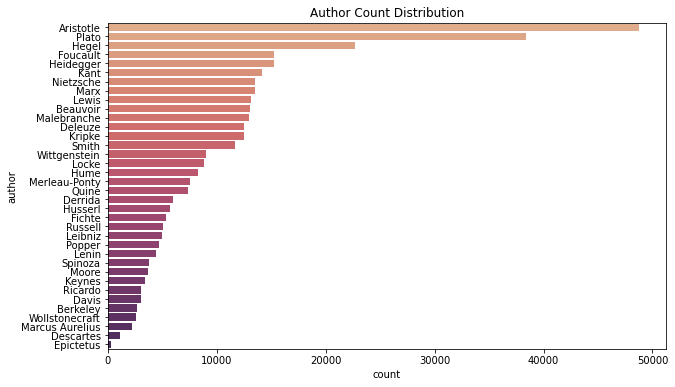

In [13]:
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
plt.title('Author Count Distribution')
sns.countplot(y = 'author', data = df2, order = df2['author'].value_counts().index, palette = 'flare')

<AxesSubplot:xlabel='original_publication_date', ylabel='Count'>

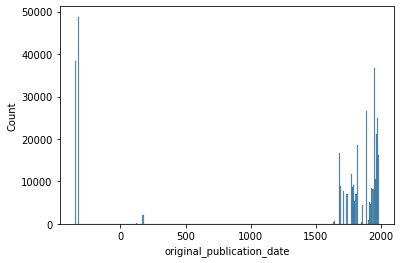

In [14]:
sns.histplot(x='original_publication_date', data = df2)

In [15]:
df_500 = df[df['original_publication_date'] < 500]
df_1900 = df[df['original_publication_date'] > 500]

<AxesSubplot:title={'center':'Author Count Distribution'}, xlabel='count', ylabel='author'>

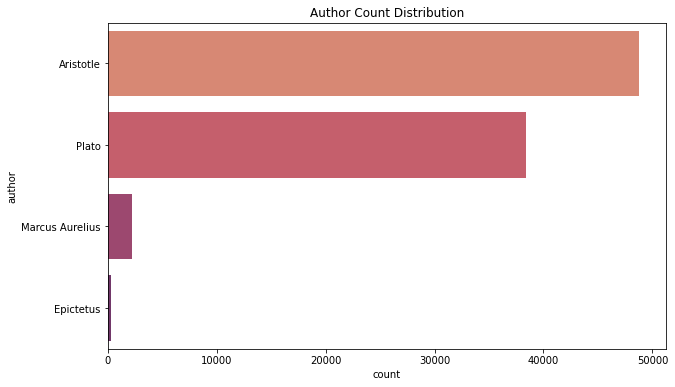

In [16]:
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
plt.title('Author Count Distribution')
sns.countplot(y = 'author', data = df_500, order = df_500['author'].value_counts().index, palette = 'flare')

<AxesSubplot:title={'center':'Author Count Distribution'}, xlabel='count', ylabel='author'>

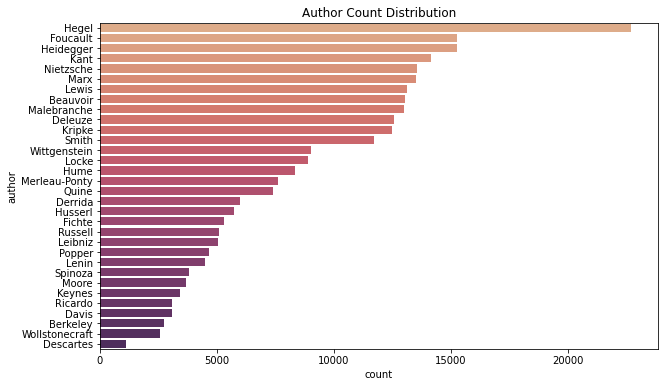

In [17]:
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
plt.title('Author Count Distribution')
sns.countplot(y = 'author', data = df_1900, order = df_1900['author'].value_counts().index, palette = 'flare')

<AxesSubplot:title={'center':'School Count Distribution'}, xlabel='count', ylabel='school'>

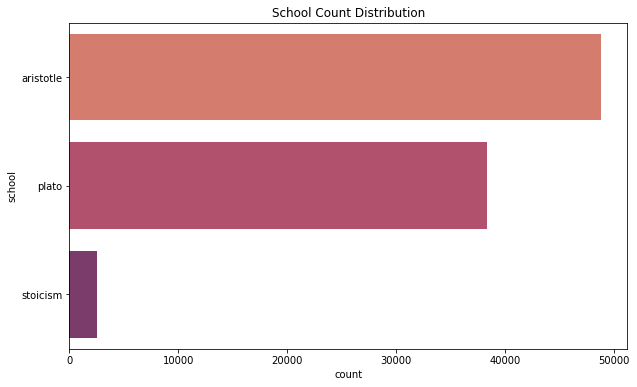

In [18]:
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
plt.title('School Count Distribution')
sns.countplot(y = 'school', data = df_500, order = df_500['school'].value_counts().index, palette = 'flare')

<AxesSubplot:title={'center':'School Count Distribution'}, xlabel='count', ylabel='school'>

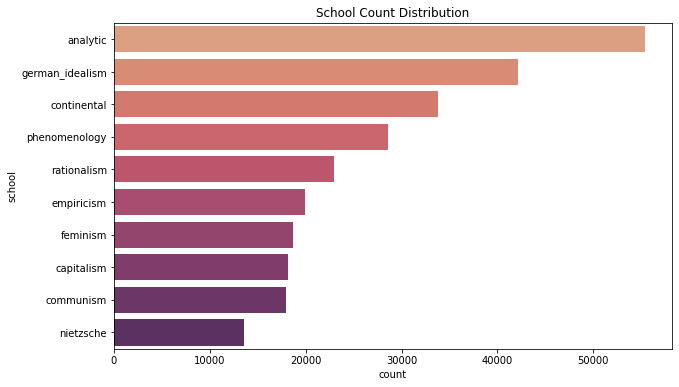

In [19]:
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
plt.title('School Count Distribution')
sns.countplot(y = 'school', data = df_1900, order = df_1900['school'].value_counts().index, palette = 'flare')

In [20]:
from lib.helper_functions import *
from collections import defaultdict
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [21]:
## Get the bar chart from bad reviews ##
freq_dict = defaultdict(int)
for sent in df2["sentence_lowered"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# ## Get the bar chart from good Reviews ##
# freq_dict = defaultdict(int)
# for sent in good_df["Reviews"]:
#     for word in generate_ngrams(sent):
#         freq_dict[word] += 1
# fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
# fd_sorted.columns = ["word", "wordcount"]
# trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words"])
fig.append_trace(trace0, 1, 1)
#fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

c:\Users\Woon\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [22]:
## Get the bar chart from bad reviews ##
freq_dict = defaultdict(int)
for sent in df2["sentence_lowered"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
fd_sorted = fd_sorted.drop(labels=0, axis=0)
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# ## Get the bar chart from good Reviews ##
# freq_dict = defaultdict(int)
# for sent in good_df["Reviews"]:
#     for word in generate_ngrams(sent):
#         freq_dict[word] += 1
# fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
# fd_sorted.columns = ["word", "wordcount"]
# trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words"])
fig.append_trace(trace0, 1, 1)
#fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

c:\Users\Woon\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [23]:
## Get the bar chart from bad reviews ##
freq_dict = defaultdict(int)
for sent in df2["sentence_lowered"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
fd_sorted = fd_sorted.drop(labels=0, axis=0)
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# ## Get the bar chart from good Reviews ##
# freq_dict = defaultdict(int)
# for sent in good_df["Reviews"]:
#     for word in generate_ngrams(sent):
#         freq_dict[word] += 1
# fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
# fd_sorted.columns = ["word", "wordcount"]
# trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words"])
fig.append_trace(trace0, 1, 1)
#fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

c:\Users\Woon\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [24]:
## Get the bar chart from bad reviews ##
freq_dict = defaultdict(int)
for sent in df2["sentence_lowered"]:
    for word in generate_ngrams(sent,4):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
fd_sorted = fd_sorted.drop(labels=0, axis=0)
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# ## Get the bar chart from good Reviews ##
# freq_dict = defaultdict(int)
# for sent in good_df["Reviews"]:
#     for word in generate_ngrams(sent):
#         freq_dict[word] += 1
# fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
# fd_sorted.columns = ["word", "wordcount"]
# trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words"])
fig.append_trace(trace0, 1, 1)
#fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

c:\Users\Woon\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [25]:
# classify how people think about the world
# how the topics of discussions have changed over time
# what certain authors' were concerned about the most
# how the sentiment of a certain topic changed over time
# how the sentiment of a certain topic changed over time - hue authors
# the author's sentence type (length, their frequently used vocab)
# what where the most firmly held beliefs.
#Clustering
#google how to hide jupyter notebook code
